Initial DataFrame:
       DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0              2.9             1.6  ...                -9.3   
1              3.6 

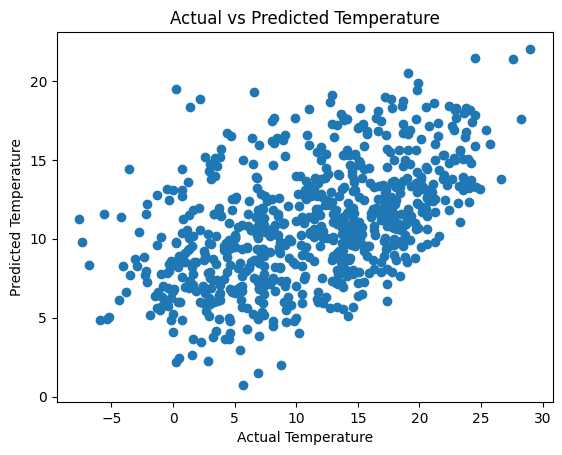


Synthetic DataFrame:
        date  temperature   humidity  wind_speed     pressure  precipitation
0 2023-01-01    22.483571  43.415750    2.645805  1018.741296       2.748060
1 2023-01-02    19.308678  87.793352    7.475517  1003.252156       8.226143
2 2023-01-03    23.238443  30.729268    6.283882  1018.956580       4.237383
3 2023-01-04    27.615149  88.192730   13.722689  1000.614673       6.675499
4 2023-01-05    18.829233  32.589595    5.435908  1000.553089       0.955353


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:\\Users\\theer\\OneDrive\\Desktop\\weather_prediction_dataset.csv")

# Display the first few rows of the dataframe
print("Initial DataFrame:")
print(df.head())

# Print column names to check for correct column names
print("\nColumn names in the DataFrame:")
print(df.columns)

# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Print column names after stripping spaces
print("\nColumn names after stripping spaces:")
print(df.columns)

# Handle missing values (if any)
df = df.dropna()

# Check for missing values after dropping
print("\nDataFrame after dropping missing values:")
print(df.isnull().sum())

# Check if 'DATE' column is present after cleaning column names
if 'DATE' not in df.columns:
    raise KeyError("The 'DATE' column is not found in the dataset. Please check the column names. Available columns: " + ", ".join(df.columns))

# Convert DATE column to datetime if necessary
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract features and target variable
required_columns = ['BASEL_humidity', 'BASEL_pressure', 'BASEL_precipitation', 'BASEL_temp_mean']
available_wind_speed_columns = [col for col in df.columns if 'wind_speed' in col.lower()]

if not available_wind_speed_columns:
    raise ValueError("No wind speed column found in the dataset.")

# Selecting the first available wind speed column
wind_speed_column = available_wind_speed_columns[0]
print(f"Using wind speed column: {wind_speed_column}")

# Adding wind speed column to required columns
required_columns.append(wind_speed_column)

missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

X = df[['BASEL_humidity', wind_speed_column, 'BASEL_pressure', 'BASEL_precipitation']]  # Features
y = df['BASEL_temp_mean']  # Target variable

print("\nFeatures (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Features (X_train):")
print(X_train.head())

print("\nTesting Features (X_test):")
print(X_test.head())

print("\nTraining Target (y_train):")
print(y_train.head())

print("\nTesting Target (y_test):")
print(y_test.head())

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

# Generate a synthetic dataset for demonstration purposes
np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=365, freq='D')
temperature = np.random.normal(20, 5, size=len(dates))
humidity = np.random.uniform(30, 90, size=len(dates))
wind_speed = np.random.uniform(0, 15, size=len(dates))
pressure = np.random.uniform(1000, 1025, size=len(dates))
precipitation = np.random.uniform(0, 10, size=len(dates))

synthetic_df = pd.DataFrame({
    'date': dates,
    'temperature': temperature,
    'humidity': humidity,
    'wind_speed': wind_speed,
    'pressure': pressure,
    'precipitation': precipitation
})

print("\nSynthetic DataFrame:")
print(synthetic_df.head())
